<a href="https://colab.research.google.com/github/Ester-Taniya/DI-Bootcamp/blob/main/Week8/Day3/Hackaton_W8_D4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
data = pd.read_csv('bank.csv',sep=';')
data.info()


In [3]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#cheack empty rows
data[data.isna().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [5]:
#cheack unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")


Unique values for column 'age': [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Unique values for column 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values for column 'marital': ['married' 'single' 'divorced' 'unknown']
Unique values for column 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values for column 'default': ['no' 'unknown' 'yes']
Unique values for column 'housing': ['no' 'yes' 'unknown']
Unique values for column 'loan': ['no' 'yes' 'unknown']
Unique values for column 'contact': ['telephone' 'cellular']
Unique values for column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar

In [6]:
df=data
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
df['total_products'] = df[['default', 'housing', 'loan']].apply(lambda row: sum(row == 'yes'), axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,total_products
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0


In [8]:
# prompt: change replace 'yes' to 1 and 'no' to 0 ''  and 'unknown ' to 0in columns  'default'	,'housing','loan'.

df['default'] = df['default'].map({'yes': 1, 'no': 0, 'unknown': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0, 'unknown': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0, 'unknown': 0})
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,total_products
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,0,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0


In [9]:
#add new columns "sum_products" on based sum 'default','housing','loan'.(its show howe many bak products have each client )

df['sum_products'] = df[['default','housing','loan']].sum(axis=1)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,total_products,sum_products
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
1,57,services,married,high.school,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
5,45,services,married,basic.9y,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
6,59,admin.,married,professional.course,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
7,41,blue-collar,married,unknown,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
8,24,technician,single,professional.course,0,1,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
9,25,services,single,high.school,0,1,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1


In [10]:
# prompt: print rows where   default is nan

df[df['default'].isna()]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,total_products,sum_products


In [11]:
#  add new colum

df['age_group'] = df['age'].apply(lambda age: 'young' if age < 25 else 'adult' if age < 45 else 'old')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,total_products,sum_products,age_group
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,old
1,57,services,married,high.school,0,0,0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,old
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1,adult
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,adult
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1,old
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,old
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,1,old
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,adult


In [12]:
# min and max age

print('The minimum age is:', df['age'].min())
print('The maximum age is:', df['age'].max())


The minimum age is: 17
The maximum age is: 98


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
df.describe()


,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total_products,sum_products
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000073,0.523842,0.151695,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.675609,0.675609
std,10.42125,0.008534,0.499437,0.358729,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.631226,0.631226
min,17.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,1.000000,1.000000
75%,47.00000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,1.000000,1.000000
max,98.00000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,2.000000,2.000000


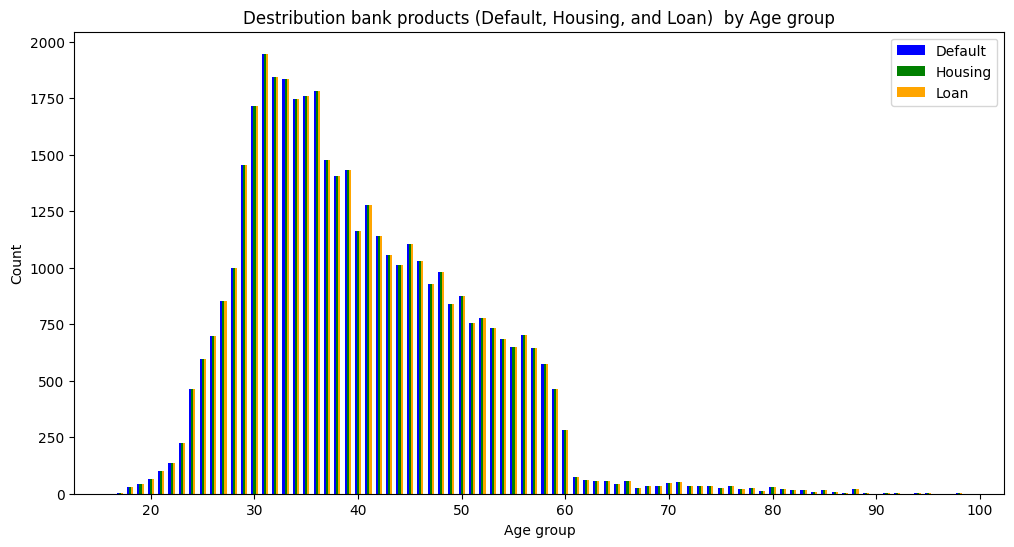

In [15]:
import matplotlib.pyplot as plt
import numpy as np  # Importing numpy for better positioning of bars

# Assuming your DataFrame is named 'df' and you have an 'age_group' column

df_grouped_default = df.groupby('age')['default'].count().reset_index()
df_grouped_housing = df.groupby('age')['housing'].count().reset_index()
df_grouped_loan = df.groupby('age')['loan'].count().reset_index()

plt.figure(figsize=(12, 6))

# Bar plot for 'default'
plt.bar(df_grouped_default['age'] - 0.2, df_grouped_default['default'], width=0.2, color='blue', label='Default')

# Bar plot for 'housing'
plt.bar(df_grouped_housing['age'], df_grouped_housing['housing'], width=0.2, color='green', label='Housing')

# Bar plot for 'loan'
plt.bar(df_grouped_loan['age'] + 0.2, df_grouped_loan['loan'], width=0.2, color='orange', label='Loan')

plt.xlabel('Age group')
plt.ylabel('Count')
plt.title('Destribution bank products (Default, Housing, and Loan)  by Age group')
plt.legend()
plt.show()



## This graph shows the distribution of loan types by age groups, as we can see that the majority of borrowers are between 25 and 40 years old

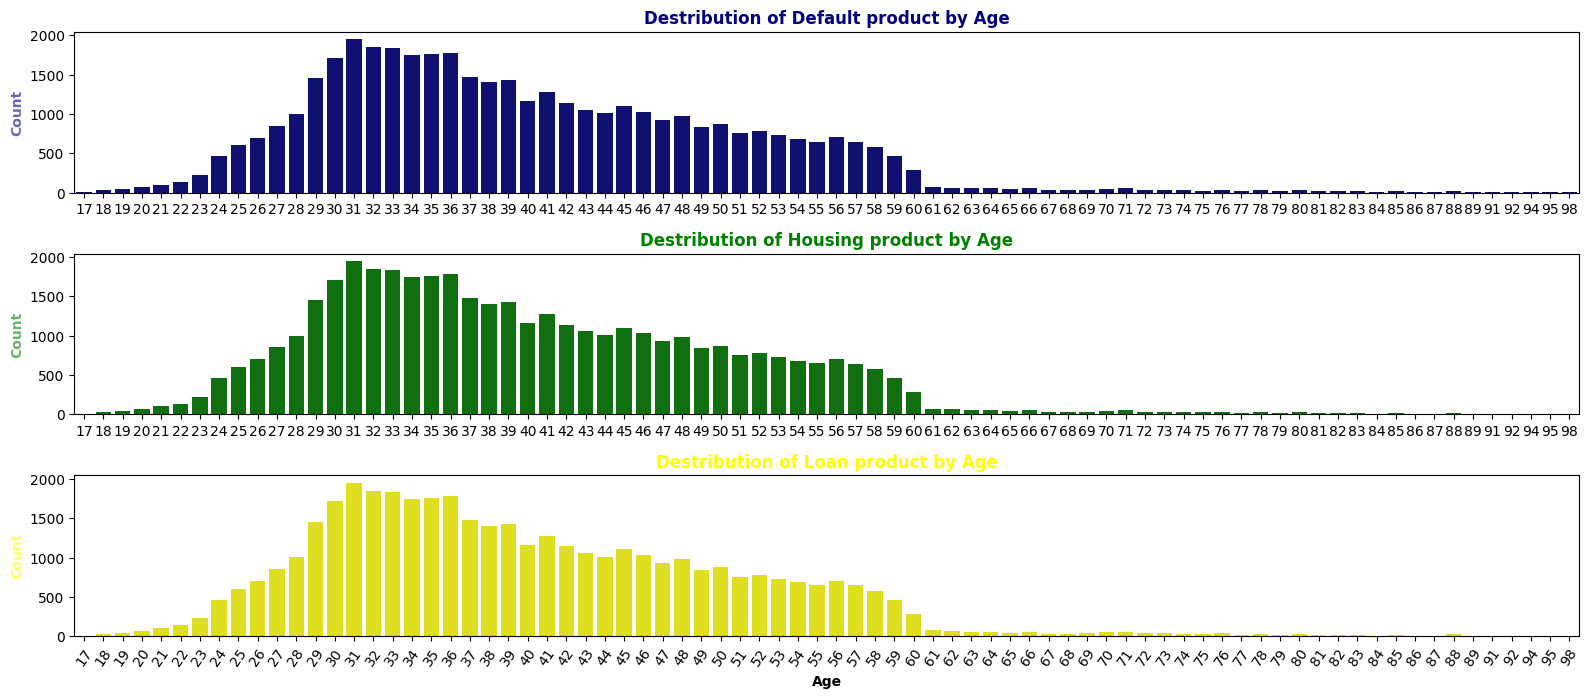

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))

# Assuming your DataFrame is named 'df'

# Count of 'default' by age
default_counts = df.groupby('age')['default'].count().reset_index()
plt.subplot(3, 1, 1)
sns.barplot(x='age', y='default', data=default_counts, color='navy')
plt.ylabel("Count", fontweight='bold', color='navy', alpha=0.6)
plt.xlabel("")
plt.title("Destribution of Default product by Age", fontweight='bold', color='navy')

# Count of 'housing' by age
housing_counts = df.groupby('age')['housing'].count().reset_index()
plt.subplot(3, 1, 2)
sns.barplot(x='age', y='housing', data=housing_counts, color='green')
plt.ylabel("Count", fontweight='bold', color='green', alpha=0.6)
plt.xlabel("")
plt.title("Destribution of Housing product by Age", fontweight='bold', color='green')

# Count of 'loan' by age
loan_counts = df.groupby('age')['loan'].count().reset_index()
plt.subplot(3, 1, 3)
sns.barplot(x='age', y='loan', data=loan_counts, color='yellow')
plt.ylabel("Count", fontweight='bold', color='yellow', alpha=0.6)
plt.xlabel("Age", fontweight="bold")
plt.title("Destribution of Loan product by Age", fontweight='bold', color='yellow')

plt.tight_layout()
plt.xticks(rotation=55)

plt.show()



# This graph gives the age distribution for each type of loan separately

In [17]:
# prompt: add column all_products where walue =1 if total products ==3, else 0

df['all_products'] = df['sum_products'].apply(lambda sum_products: 1 if sum_products == 3 else 0)
df



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,total_products,sum_products,age_group,all_products
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,old,0
1,57,services,married,high.school,0,0,0,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,old,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1,adult,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,adult,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1,old,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1,old,0
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,old,0
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,1,1,old,0
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,adult,0


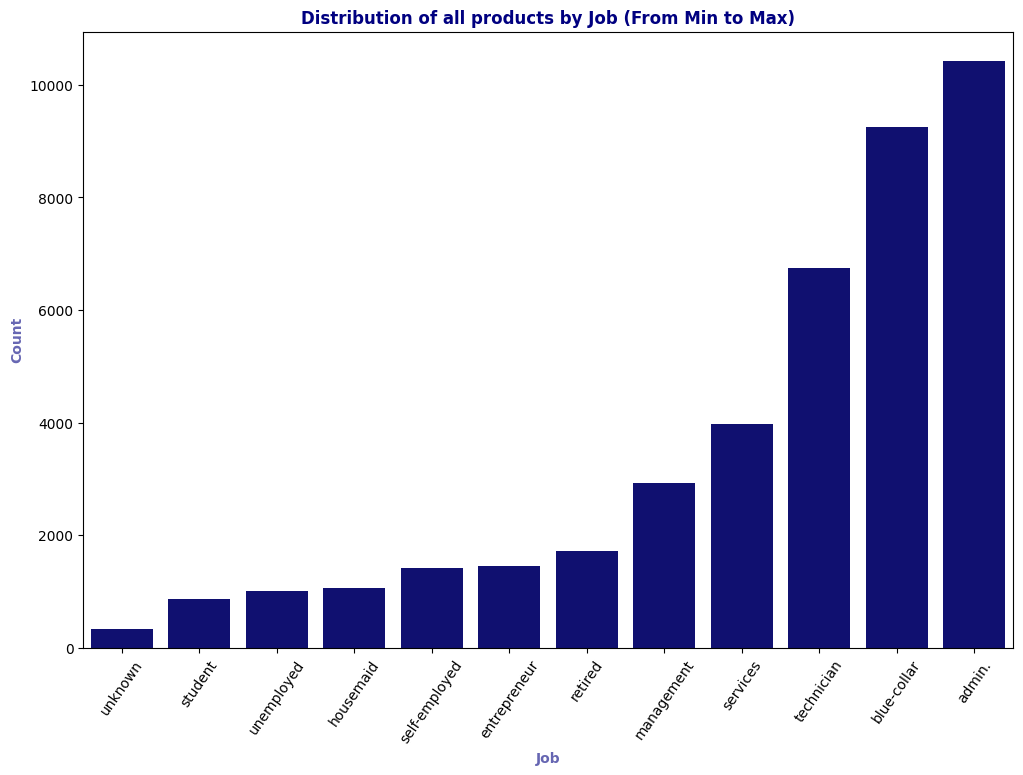

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Count of 'all_products' by job
all_products_counts = df.groupby('job')['all_products'].count().reset_index()

# Sort the DataFrame by 'all_products' count in ascending order
all_products_counts = all_products_counts.sort_values(by='all_products')

plt.figure(figsize=(12, 8))

# Bar plot for the distribution of 'all_products' by job (from min to max)
sns.barplot(x='job', y='all_products', data=all_products_counts, color='navy')
plt.xlabel("Job", fontweight='bold', color='navy', alpha=0.6)
plt.ylabel("Count", fontweight='bold', color='navy', alpha=0.6)
plt.title("Distribution of all products by Job (From Min to Max)", fontweight='bold', color='navy')
plt.xticks(rotation=55)

plt.show()



# this graph shows the distribution of types of work of people who have registered for a banking product, which in the future can show a group of potential clients

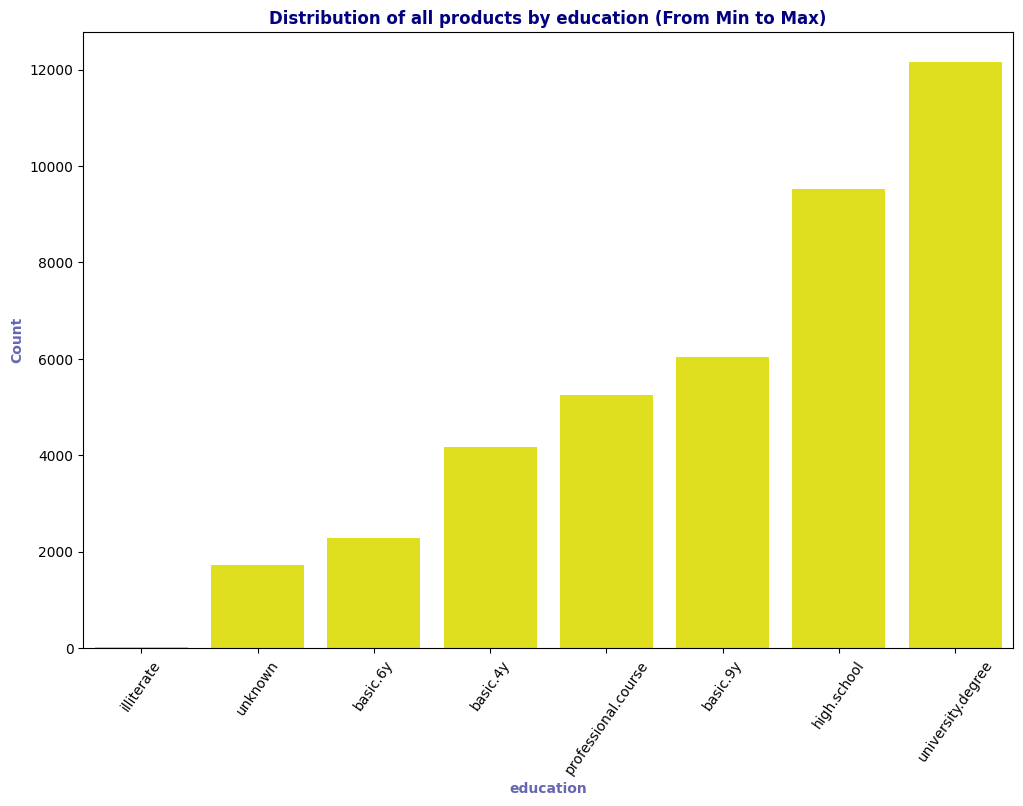

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Count of 'all_products' by job
all_products_counts = df.groupby('education')['all_products'].count().reset_index()

# Sort the DataFrame by 'all_products' count in ascending order
all_products_counts = all_products_counts.sort_values(by='all_products')

plt.figure(figsize=(12, 8))

# Bar plot for the distribution of 'all_products' by job (from min to max)
sns.barplot(x='education', y='all_products', data=all_products_counts, color='yellow')
plt.xlabel("education", fontweight='bold', color='navy', alpha=0.6)
plt.ylabel("Count", fontweight='bold', color='navy', alpha=0.6)
plt.title("Distribution of all products by education (From Min to Max)", fontweight='bold', color='navy')
plt.xticks(rotation=55)

plt.show()


# the highest indicator in the chart also provides a potential group of clients that can be targeted in the following programs

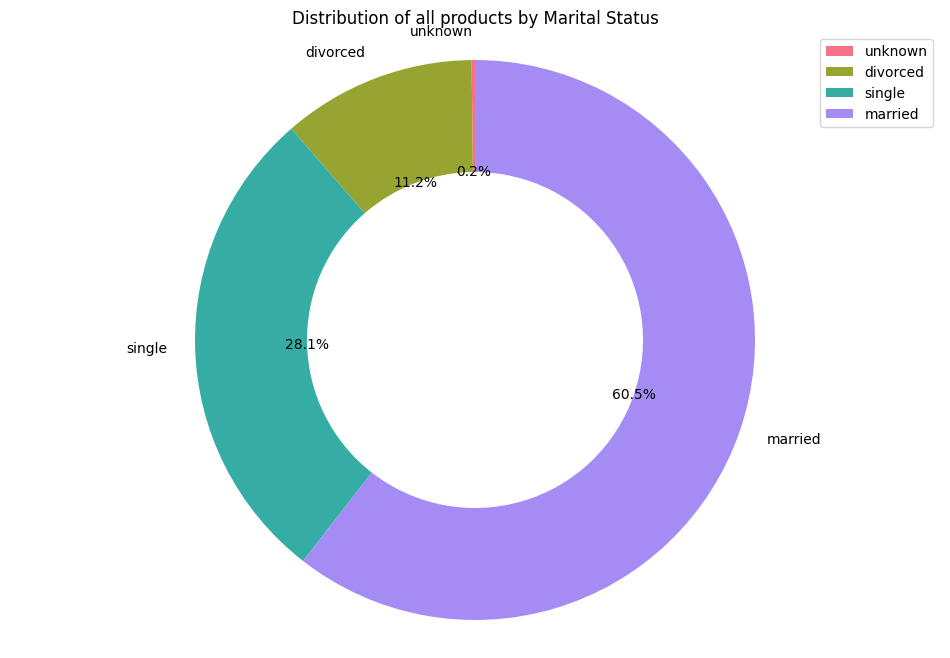

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Count of 'all_products' by marital status
all_products_counts = df.groupby('marital')['all_products'].count().reset_index()

# Sort the DataFrame by 'all_products' count in ascending order
all_products_counts = all_products_counts.sort_values(by='all_products')

plt.figure(figsize=(12, 8))

# Assign colors based on marital status
colors = sns.color_palette("husl", n_colors=len(all_products_counts))

# Explode the 'Married' slice
explode = [0.1 if status == 'Married' else 0 for status in all_products_counts['marital']]

# Pie plot for the distribution of 'all_products' by marital status with custom colors and explode
plt.pie(all_products_counts['all_products'], labels=all_products_counts['marital'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, wedgeprops=dict(width=0.4), labeldistance=1.1)

# Add legend
plt.legend(all_products_counts['marital'], loc="best")

# Add title
plt.title("Distribution of all products by Marital Status")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.show()


# The donut chart shows that the main borrowers are married people

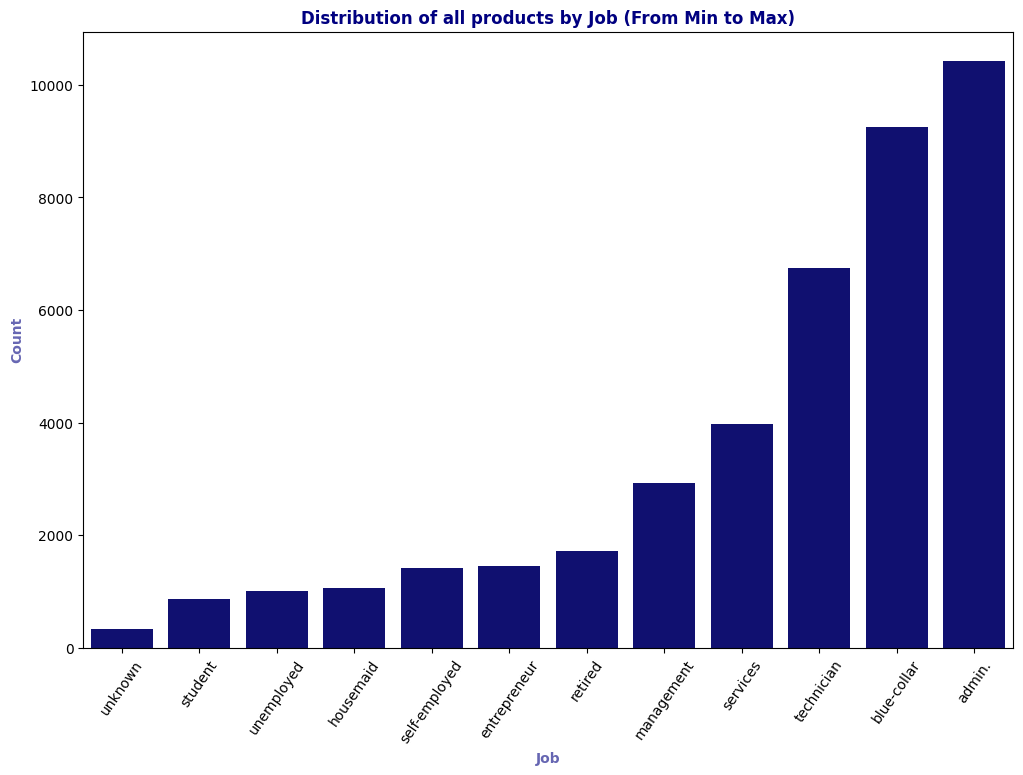

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Count of 'all_products' by job
all_products_counts = df.groupby('job')['all_products'].count().reset_index()

# Sort the DataFrame by 'all_products' count in ascending order
all_products_counts = all_products_counts.sort_values(by='all_products')

plt.figure(figsize=(12, 8))

# Bar plot for the distribution of 'all_products' by job (from min to max)
sns.barplot(x='job', y='all_products', data=all_products_counts, color='navy')
plt.xlabel("Job", fontweight='bold', color='navy', alpha=0.6)
plt.ylabel("Count", fontweight='bold', color='navy', alpha=0.6)
plt.title("Distribution of all products by Job (From Min to Max)", fontweight='bold', color='navy')
plt.xticks(rotation=55)

plt.show()


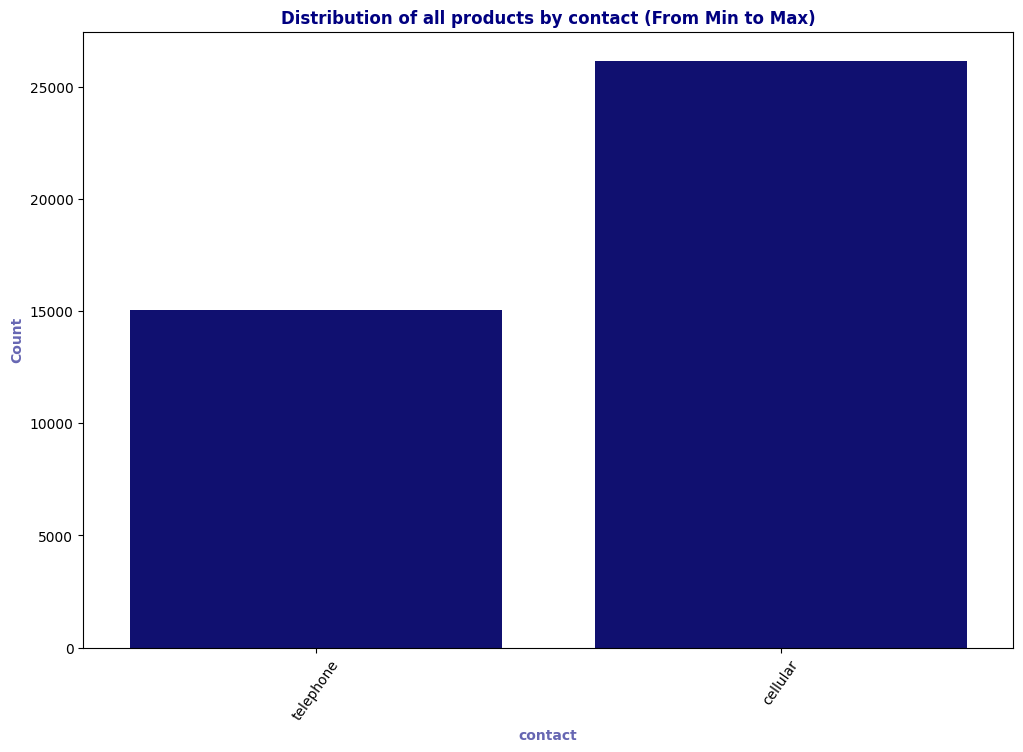

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Count of 'all_products' by job
all_products_counts = df.groupby('contact')['all_products'].count().reset_index()

# Sort the DataFrame by 'all_products' count in ascending order
all_products_counts = all_products_counts.sort_values(by='all_products')

plt.figure(figsize=(12, 8))

# Bar plot for the distribution of 'all_products' by job (from min to max)
sns.barplot(x='contact', y='all_products', data=all_products_counts, color='navy')
plt.xlabel("contact", fontweight='bold', color='navy', alpha=0.6)
plt.ylabel("Count", fontweight='bold', color='navy', alpha=0.6)
plt.title("Distribution of all products by contact (From Min to Max)", fontweight='bold', color='navy')
plt.xticks(rotation=55)

plt.show()



# this graph shows that the effectiveness of calls using a phrase mobile phone is higher than using a regular telephone

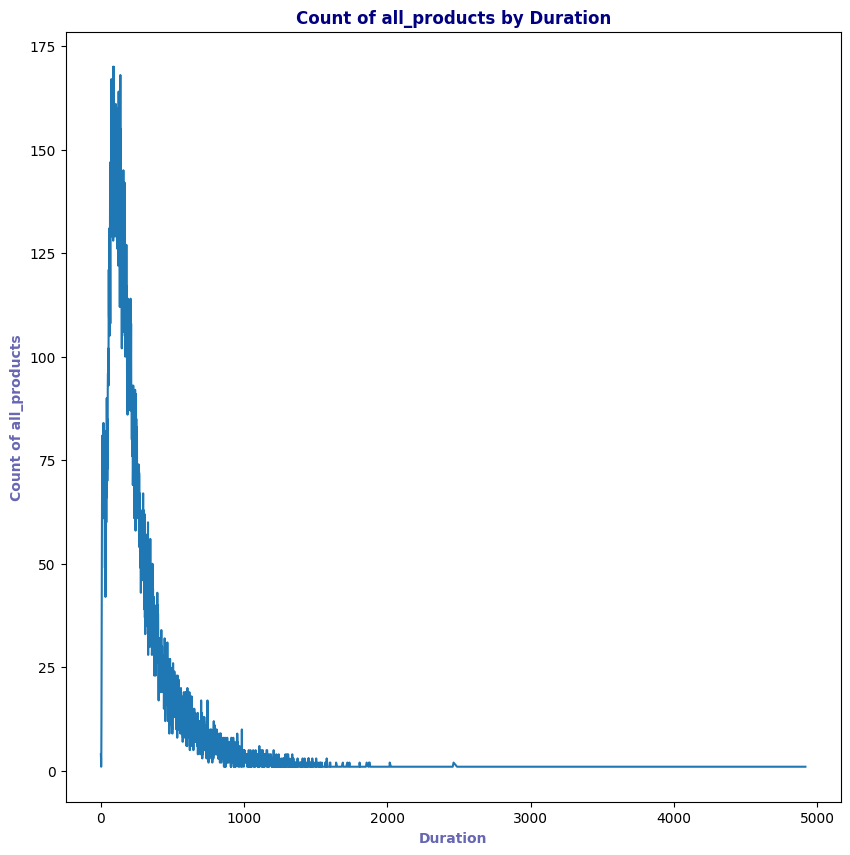

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Group by 'duration' and calculate the count of 'all_products'
count_products_by_duration = df.groupby('duration')['all_products'].count()

# Plot the line chart with dots
count_products_by_duration.plot(kind='line', figsize=(10, 10))

plt.xlabel("Duration", fontweight='bold', color='navy', alpha=0.6)
plt.ylabel("Count of all_products", fontweight='bold', color='navy', alpha=0.6)
plt.title("Count of all_products by Duration", fontweight='bold', color='navy')
plt.show()


# This graph shows successful cases and the amount of time spent on communication between a bank representative and a client (however, it is more convenient to translate this into minutes) and what is done below

In [25]:
# create a column by converting seconds to minutes

df['duration_min'] = df['duration'] / 60


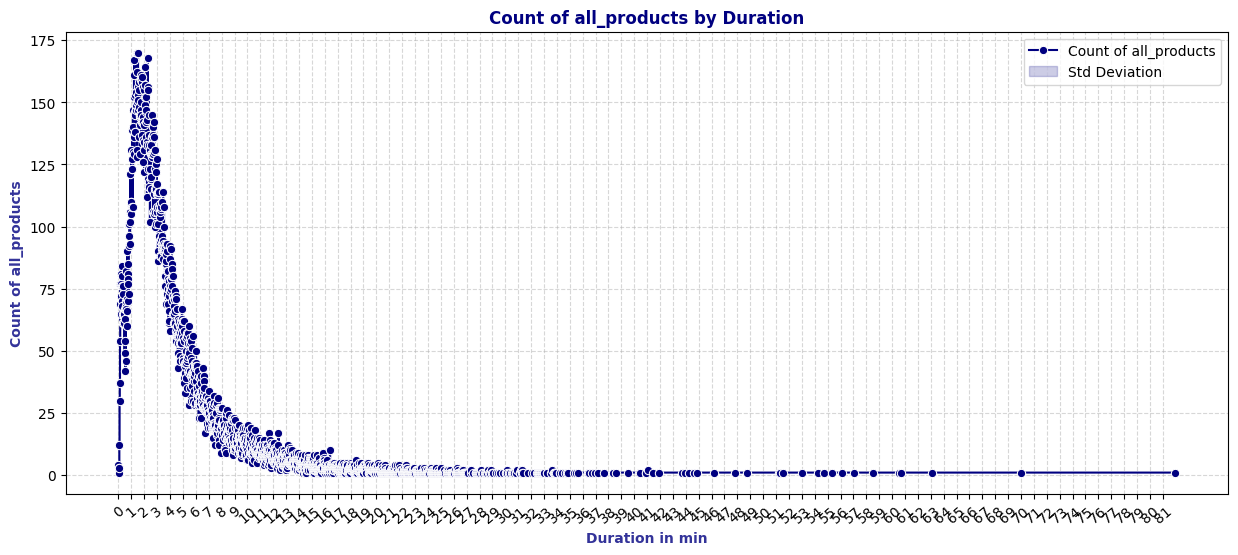

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Group by 'duration' and calculate the count of 'all_products' and standard deviation
count_products_by_duration = df.groupby('duration_min')['all_products'].agg(['count', 'std'])

# Plot the line chart with dots
plt.figure(figsize=(15, 6))

# Using seaborn for styling
sns.lineplot(x=count_products_by_duration.index, y='count', data=count_products_by_duration, marker='o', color='navy', label='Count of all_products', drawstyle='steps-post')

# Plot a shaded region representing the standard deviation
plt.fill_between(count_products_by_duration.index,
                 count_products_by_duration['count'] - count_products_by_duration['std'],
                 count_products_by_duration['count'] + count_products_by_duration['std'],
                 color='navy', alpha=0.2, label='Std Deviation')

plt.xlabel("Duration in min", fontweight='bold', color='navy', alpha=0.8)
plt.ylabel("Count of all_products", fontweight='bold', color='navy', alpha=0.8)
plt.title("Count of all_products by Duration", fontweight='bold', color='navy')

# Set x-axis ticks at smaller intervals for more granularity
plt.xticks(range(0, int(max(count_products_by_duration.index))+1, 1), rotation=40)

# Add a grid for better reference
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend()

# Show the plot
plt.show()


# this graph shows that the majority of successful cases were made in calls from 1 to 3 minutes

# Based on the above data, recommendations can be made for the following companies the main target group of clients will be people
- age from 25 to 40
-with high-school or university education
- married
- those who have a job in management service, technical blue-color or administrative

Recommendations will also be given to make calls
 - on a mobile phone
 - from 1 minute to 3